In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import seaborn as sns
%matplotlib inline

In [2]:
# integrating the normal distribution function around zero to get z-value
def npd(x):
    return ((1/np.sqrt(2*np.pi))*np.exp((-x**2)/2))

# quad(npd,np.NINF,(df['data'].min()-mean)/sd)[0]
# print(quad(npd,np.NINF,1.52))

In [3]:
df = pd.read_csv('data1.csv')

In [4]:
df.head()

,data
0,3144.36
1,3714.51
2,1608.26
3,3379.63
4,2537.26


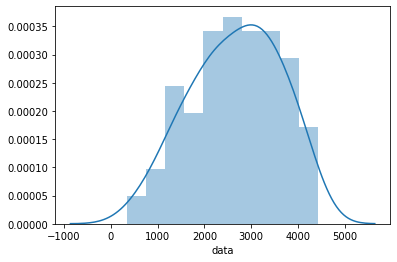

In [5]:
sns.distplot(df['data'],bins=10)

In [9]:
# storing the mean of each data in arrays
mean = df['data'].mean()
sd = df['data'].std()

In [10]:
# Chi-Squared Test
quater_percentile = df['data'].loc[4]
bin = (mean-quater_percentile)*2

cs_df = pd.DataFrame(index=[1,2,3,4,5,6,7,8],columns=['Interval_min','Interval_max','ni','pi','ei','ni_sq_by_ei'])
cs_df['Interval_min'].loc[5] = cs_df['Interval_max'].loc[4] = mean
cs_df['Interval_min'].loc[4] = cs_df['Interval_max'].loc[3] = mean - bin
cs_df['Interval_min'].loc[3] = cs_df['Interval_max'].loc[2] = mean - 2*bin
cs_df['Interval_min'].loc[2] = cs_df['Interval_max'].loc[1] = mean - 3*bin
cs_df['Interval_max'].loc[1] = mean - 3*bin
cs_df['Interval_min'].loc[1] = df['data'].min()
cs_df['Interval_min'].loc[6] = cs_df['Interval_max'].loc[5] = mean + bin
cs_df['Interval_min'].loc[7] = cs_df['Interval_max'].loc[6] = mean + 2*bin
cs_df['Interval_min'].loc[8] = cs_df['Interval_max'].loc[7] = mean + 3*bin
cs_df['Interval_min'].loc[8] = mean + 3*bin
cs_df['Interval_max'].loc[8] = df['data'].max()

In [11]:
for i in cs_df.index:
    cs_df['ni'][i] = df[(df['data']>cs_df['Interval_min'][i]) & (df['data']<cs_df['Interval_max'][i])]['data'].count()
    cs_df['pi'][i] = quad(npd,np.NINF,(cs_df['Interval_max'][i]-mean)/sd)[0] - quad(npd,np.NINF,(cs_df['Interval_min'][i]-mean)/sd)[0]
    cs_df['ei'][i] = df['data'].size * cs_df['pi'][i]
    cs_df['ni_sq_by_ei'] = (cs_df['ni']**2)/cs_df['ei']

In [12]:
cs_df

,Interval_min,Interval_max,ni,pi,ei,ni_sq_by_ei
1,346.63,1883.62,20,0.198296,19.8296,20.1718
2,1883.62,2145.08,11,0.086245,8.6245,14.0298
3,2145.08,2406.53,7,0.100083,10.0083,4.89592
4,2406.53,2667.99,8,0.107814,10.7814,5.93615
5,2667.99,2929.44,11,0.107814,10.7814,11.223
6,2929.44,3190.9,8,0.100083,10.0083,6.39468
7,3190.9,3452.35,13,0.086245,8.6245,19.5953
8,3452.35,4433.67,20,0.173548,17.3548,23.0484


In [13]:
test_stat_value = cs_df['ni_sq_by_ei'].sum() - df['data'].size

In [14]:
chi_df = pd.read_csv('chi_table.csv')
alpha = 0.05
dof = cs_df['Interval_min'].size-1

In [15]:
columns = np.array(chi_df.columns)
# print(columns)
for i in range(len(columns)):
    if columns[i] == str(alpha):
        alpha_col_index = i

In [16]:
chi_df

,0.995,0.975,0.2,0.1,0.05,0.025,0.02,0.01,0.005,0.002,0.001
0,0.000039,0.000982,1.642,2.706,3.841,5.024,5.412,6.635,7.879,9.550,10.828
1,0.010000,0.050600,3.219,4.605,5.991,7.378,7.824,9.210,10.597,12.429,13.816
2,0.071700,0.216000,4.642,6.251,7.815,9.348,9.837,11.345,12.838,14.796,16.266
3,0.207000,0.484000,5.989,7.779,9.488,11.143,11.668,13.277,14.860,16.924,18.467
4,0.412000,0.831000,7.289,9.236,11.070,12.833,13.388,15.086,16.750,18.907,20.515
5,0.676000,1.237000,8.558,10.645,12.592,14.449,15.033,16.812,18.548,20.791,22.458
6,0.989000,1.690000,9.803,12.017,14.067,16.013,16.622,18.475,20.278,22.601,24.322
7,1.344000,2.180000,11.030,13.362,15.507,17.535,18.168,20.090,21.955,24.352,26.124
8,1.735000,2.700000,12.242,14.684,16.919,19.023,19.679,21.666,23.589,26.056,27.877
9,2.156000,3.247000,13.442,15.987,18.307,20.483,21.161,23.209,25.188,27.722,29.588


In [17]:
critical_value = chi_df.iloc[dof-1,alpha_col_index]

In [22]:
if critical_value<=test_stat_value:
    print("Reject Null Hypothesis %s")
else:
    print("Failed to reject Null hypothesis")

Failed to reject Null hypothesis %s abc
